# Factors of Happiness Data Visualization

### Install Packages

In [5]:
#basics:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns #heatmap, stripplot
from csv import DictReader

#plots:
import matplotlib.pyplot as plt
import plotly.graph_objs as go #Choropleth/ Mixeed Subplot graphs
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py #choropleth map
from plotly.graph_objs import *

#machine learning:
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



### Read in Data
We first read in the data from a csv file and rename the columns

In [7]:
happy = pd.read_csv('AdvancedDataViz/Data/happy15.csv', ',')

happy.columns=['country','region','rank',
'score','std_err','gdp',
'fam','life','free',
'gov','gen','dyst']

## Basic EDA and Data Visualization
1. Scatterplot to show relationship between life expectency and gdp
2. Scatterplot to show relationship between gdp and happiness rank
3. Correlation matrix plot between variables

### Summary Statistics and Data Properties

In [27]:
happy.head()

,country,region,rank,score,std_err,gdp,fam,life,free,gov,gen,dyst
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [28]:
happy.describe()

,rank,score,std_err,gdp,fam,life,free,gov,gen,dyst
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [43]:
print( 'Region & Number of Observations: \n')
print(happy['region'].value_counts())

Region & Number of Observations: 

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: region, dtype: int64


### Introductory Data Visualization
We will include scatterplots, a correlation matrix, ...

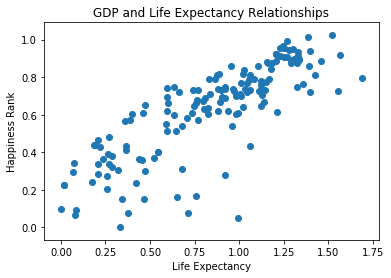

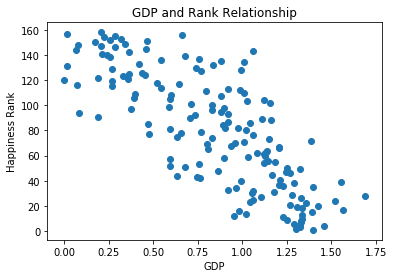

In [44]:
plt.scatter(happy['gdp'], happy['life'])
plt.ylabel('Happiness Rank')
plt.xlabel('Life Expectancy')
plt.title('GDP and Life Expectancy Relationships')
plt.show()

plt.scatter(happy['gdp'], happy['rank'])
plt.ylabel('Happiness Rank')
plt.xlabel('GDP')
plt.title('GDP and Rank Relationship')
plt.show()

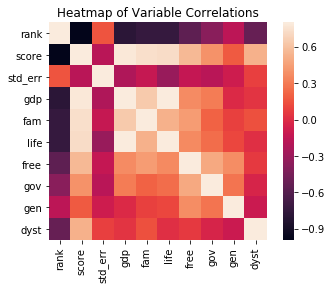

In [45]:
happy.corr(method='pearson')
corrmap = happy.corr()
sns.heatmap(corrmap, vmax=.8, square=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

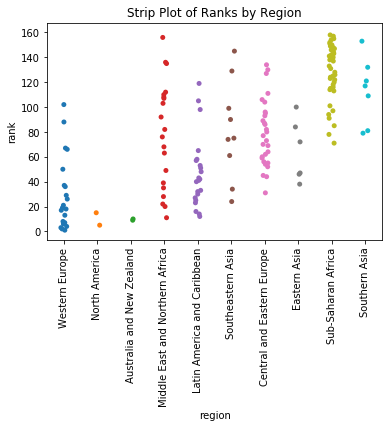

In [46]:
a = sns.stripplot(x="region", y="rank", data=happy, jitter=True)
plt.xticks(rotation=90)
plt.title('Strip Plot of Ranks by Region')
plt.show()

## Advanced Data Visualization

### Mapping Color Scale
https://plot.ly/python/choropleth-maps/
create a dictionary to map color codes to different scale marks
This will assign different shades of blue to the various levels of happiness with the darkest
shade correstponding to the highest ranking and the lightest shade corresponding to the lowest
for color palates: https://www.colorcodehex.com/9ac9ca/

In [48]:
scl = [[0.0, 'rgb(26,50,49)'],[0.2, 'rgb(52,100,98)'],[0.4, 'rgb(70,134,132)'],\
            [0.6, 'rgb(137,193,191)'],[0.8, 'rgb(178,228,227)'],[1.0, 'rgb(238,246,246)']]

### Plotting First Choropleth Plot for Score
* Plotting a heatmap with geographic data (aka a choropleth map) using plotly 
* The darker the coloring, the higher the happiness score
* plotted with a cylindrical map projection, which is fairly standard

In [55]:
meta_data = dict(type = 'choropleth', 
           locations = happy['country'], 
           colorscale = scl, 
           reversescale = True, 
           locationmode = 'country names', 
           z = happy['score'], 
           marker= dict(line=dict(color='black', 
                        width=1)), 
           text = happy['country'], 
           hoverlabel= dict(bgcolor= 'D68C24',
                            font=dict(family='Times New Roman',
                                      color='white')), 
           colorbar = {'title':'Happiness Score', 'nticks':9}
           )   

layout = dict(title = 'Global Choropleth Plot By Happiness Score', 
             geo = dict(showframe = True, 
                       projection = {'type': 'Mercator'})) 

My_choromap = go.Figure(data = [meta_data], layout=layout)
iplot(My_choromap)

## Multi-Plot Visualization
* 3D global cloropleth plot
* Bar plot summarizing results and average score by region

In [112]:
choro_data = dict(
           geo= dict(projection=dict(type='orthographic')),
           type = 'choropleth', 
           locations = happy['country'], #plots the countries on our map
           locationmode = 'country names', #determines set of locations to match our locations entrie (use country names for world map)
           z = happy['score'], #the variable we are measuring
           marker= dict(line=dict(color='black', 
                        width=1)), #country outlines
           text = happy['country'], #hover text
           hoverlabel= dict(bgcolor= 'D68C24',
                            font=dict(family='Times New Roman',
                                      color='white'))) #changes our hover text style   
    
bar_data3 = Bar(
            x=happy['region'],
            y=happy['score'],
            marker=dict(color='rgb(12,80,110)',
                        line=dict(color='green'))
        )


layout = {
  "plot_bgcolor": 'white',
  "paper_bgcolor": 'white',
  "titlefont": {
      "size": 45,
      "family": "Raleway"
  },
  "font": {
      "color": 'black'
  },
  "margin": {  #margins around the entire box
    "r": 10, 
    "t": 80, 
    "b": 40, 
    "l": 10
  }, 
  "showlegend": False, 
  "title": "Regions By Happiness Score", 
  "xaxis": {
    "anchor": "auto", 
    "domain": [0.05, 0.5],
    "tickangle": "50"
  }, 
  "yaxis": {
    "title": "Happiness Score",
    "anchor": "auto", 
    "domain": [0.35, 0.95],
    "showgrid": False
  },
  "dragmode": "zoom", 
  "geo": {
      "domain": {
      "x": [0.55, 0.95], 
      "y": [0.25, 0.95]},
      "projection": {'type': "orthographic"},
      "lakecolor": "rgba(127,205,255,1)",
      "oceancolor": "rgb(17,122,152)",
      "landcolor": 'white',
      "projection": {"type": "orthographic"}, 
      "scope": "world", 
      "showlakes": True,
      "showocean": True,
      "showland": True,
      "bgcolor": 'white'
  }}
data3 = Data([choro_data,bar_data3])
fig3 = Figure(data=data3, layout=layout)
iplot(fig3)